In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import datasets
from scipy.stats import multivariate_normal
import pandas as pd
import seaborn

import sys
sys.version_info

sys.version_info(major=3, minor=12, micro=7, releaselevel='final', serial=0)

In [38]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True  # Use per default a grid, i.e. plt.grid()

- `Tab`: Code completion or indent
- `Shift-Tab`: Tooltip
- `Shift-Tab Shift+Tab`: Long tooltip
- `Ctrl-Enter`: Run selected cells
- `Shift-Enter`: Run cell, select below
- `Alt-Enter`: Run cell and insert below
- `Ctrl-#`: Comment
- `Esc a`: New cell above
- `Esc b`: New cell below
- `Esc d d`: Delete current cell
- `Esc m`: Turn current cell into Markdown cell
- `Esc y`: Turn current cell into code cell

# Linear Discriminant Analysis

$p({\bf x} | \omega_k) = \mathcal N({\bf x}; {\boldsymbol \mu_k} , {\bf \Sigma})$

# Discriminant

$g_k({\bf x}) = \ln p({\bf x}, \omega_k)$

# Decision Rule

$\hat \omega = \operatorname{argmax}_{\omega_k} \{g_k({\bf x})\}$

...

...

...

# Solution

${\bf w} = {\bf \Sigma}^{-1} (\boldsymbol \mu_k - \boldsymbol \mu_c)$

$\mathbf x_0 = \frac{1}{2} (\boldsymbol \mu_k + \boldsymbol\mu_c) - \dfrac{\ln\left(\dfrac{\operatorname{Pr}(\omega_k)}{\operatorname{Pr}(\omega_c)}\right)}{(\boldsymbol \mu_k - \boldsymbol\mu_c)^{\mathrm T} \boldsymbol \Sigma^{-1} (\boldsymbol \mu_k - \boldsymbol\mu_c)}(\boldsymbol \mu_k - \boldsymbol\mu_c)$

$\mathbf{w}^T(\mathbf{x} - \mathbf x_0)  \overset{\hat{\omega}=\omega_k}{\underset{\hat{\omega}=\omega_c}{\gtrless}} 0$


![](https://thegoodpython.com/assets/images/iris-species.png)

# Understand the dataset

In [39]:
ds = datasets.load_iris()
print(ds['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [40]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
print(ds['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [42]:
print(ds['data'].shape)

(150, 4)


In [43]:
print(ds['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [44]:
print(ds['target_names'])

['setosa' 'versicolor' 'virginica']


In [45]:
print(ds['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [46]:
print(ds['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [47]:
print(ds['filename'])

iris.csv


In [48]:
print(ds['data_module'])

sklearn.datasets.data


In [49]:
print(ds['frame'])

None


In [50]:
def add_scatter_to_plot():
    color_cycle = ['blue', 'red', 'green']
    for target_index, (target_name, color) in enumerate(zip(ds['target_names'], color_cycle)):
        X = ds['data'][ds['target'] == target_index, :]
        plt.scatter(X[:, 2], X[:, 3], c=color, label=target_name)
    plt.legend()
    plt.xlabel(ds['feature_names'][2])
    plt.ylabel(ds['feature_names'][3])

add_scatter_to_plot()

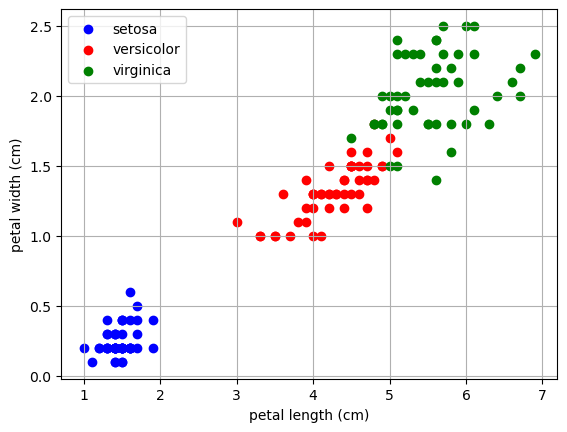

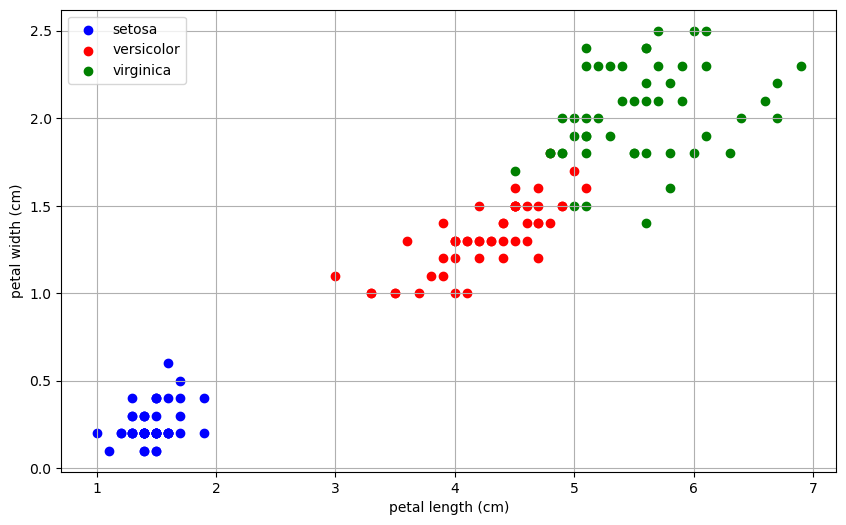

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

def add_scatter_to_plot():
    plt.figure(figsize=(10, 6))  # Optional: Set figure size
    color_cycle = ['blue', 'red', 'green']
    for target_index, (target_name, color) in enumerate(zip(ds['target_names'], color_cycle)):
        X = ds['data'][ds['target'] == target_index, :]
        plt.scatter(X[:, 2], X[:, 3], c=color, label=target_name)
    plt.legend()
    plt.xlabel(ds['feature_names'][2])
    plt.ylabel(ds['feature_names'][3])
    plt.show()  # Explicitly show the plot

add_scatter_to_plot()

# LDA

We assume that the distribution of each class "not virginica" vs. "virginica" is Gaussian.
- Estimate the mean vector and covariance matrix for each class.
  - For individual covariance matrices.
  - For tied covariance matrices.
- Plot the data and the corresponding covariance contours (1-sigma environments).
  - For individual covariance matrices.
  - For tied covariance matrices.
- Calculate the linear discriminant (LDA) for classification.
  - For tied covariance matrices.
  - Check, what happens if you ignore the prior weights. In what direction does the decision boundary move?

In [52]:
features = ds['data'][:, 2:]
features.shape

(150, 2)

In [53]:
labels = (ds['target'] == 2).astype(int)
print(labels.shape)
print(labels[123])

(150,)
1


In [54]:
features[labels == 2, :].shape

(0, 2)

We now have different ways to calculate the mean and covariance.
- We can either select the data first or provide weights to the mean function.
- Here, we start with the simple version, where we select the data outside of the function.
- A bias correction for the covariance matrix is ignored here.

In [55]:
def mean(x):
    return np.mean(x, axis=0)

def covariance(x):
    # Center the data by subtracting the mean
    x_centered = x - np.mean(x, axis=0)
    # Calculate the covariance matrix (without bias correction)
    return (x_centered.T @ x_centered) / x.shape[0]

Lets write a small test.
From the dataset description, we know the global mean of each feature.

In [56]:
def test_almost_equal(actual, desired, atol=0.01):
    assert np.abs(actual - desired) < atol, 'Difference is too big: {}'.format(actual - desired)

global_mean = mean(features)

test_almost_equal(global_mean[0], 3.76)
test_almost_equal(global_mean[1], 1.20)

## Different mean and different covariance matrix

In [57]:
mean_not_virginica = mean(features[labels == 0])
mean_virginica = mean(features[labels == 1])

covariance_not_virginica = covariance(features[labels == 0])
covariance_virginica = covariance(features[labels == 1])

In [58]:
print("Mean (Not Virginica):\n", mean_not_virginica)
print("\nMean (Virginica):\n", mean_virginica)
print("\nCovariance (Not Virginica):\n", covariance_not_virginica)
print("\nCovariance (Virginica):\n", covariance_virginica)

Mean (Not Virginica):
 [2.861 0.786]

Mean (Virginica):
 [5.552 2.026]

Covariance (Not Virginica):
 [[2.080179 0.794254]
 [0.794254 0.316204]]

Covariance (Virginica):
 [[0.298496 0.047848]
 [0.047848 0.073924]]


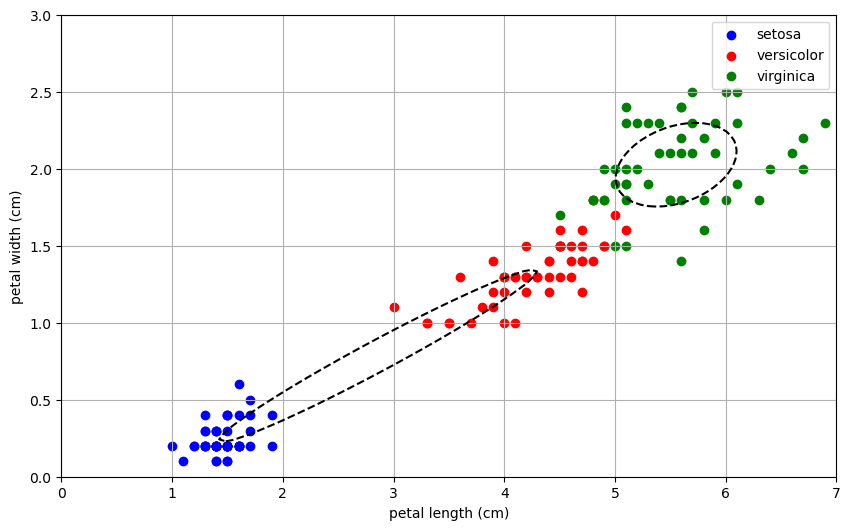

In [62]:
# First, create the figure and axis
plt.figure(figsize=(10, 6))

# Create the grid
steps = 100
x, y, features_grid = compute_complete_grid((0, 7), (0, 3), steps=steps)

# Plot "not_virginica" covariance contour
z = multivariate_normal.pdf(features_grid, mean_not_virginica, covariance_not_virginica)
levels = [multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), covariance_not_virginica) * np.exp(-0.5 * 1 ** 2)]
plt.contour(x, y, z, levels, colors='black', linestyles='dashed')

# Plot "virginica" covariance contour
z = multivariate_normal.pdf(features_grid, mean_virginica, covariance_virginica)
levels = [multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), covariance_virginica) * np.exp(-0.5 * 1 ** 2)]
plt.contour(x, y, z, levels, colors='black', linestyles='dashed')

# Now modify the add_scatter_to_plot to use the current figure
def add_scatter_to_plot():
    color_cycle = ['blue', 'red', 'green']
    for target_index, (target_name, color) in enumerate(zip(ds['target_names'], color_cycle)):
        X = ds['data'][ds['target'] == target_index, :]
        plt.scatter(X[:, 2], X[:, 3], c=color, label=target_name)
    plt.legend()
    plt.xlabel(ds['feature_names'][2])
    plt.ylabel(ds['feature_names'][3])

# Call the modified function
add_scatter_to_plot()

# Show the combined plot
plt.show()

Although the estimator may be more precise using different covariance matrices, it will not yield a linear discriminant.
Therefore, we here simplify the model further to just allow a shared covariance matrix (tied covariance matrix).

## Different mean but tied covariance matrix

To calculate a tied covariance, we need to calculate the mean per class first.
We can then subtract the mean of the corresponding class from each feature.

This is a bit cumbersome.
We may also calculate the mean per class and weight it with the count per class $N_k$.

Please note, that we again ignore any bias correction.

The most robust recipe is as follows ([Scikit-Learn](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/mixture/gaussian_mixture.py#L172)):
\begin{align}
\boldsymbol\Sigma = \frac 1 N \sum_{n=1}^N \mathbf x_n \mathbf x_n^{\mathsf T} - \frac{1}{N} \sum_{k=1}^K N_k \boldsymbol \mu_k \boldsymbol \mu_k^{\mathsf T}
\end{align}

In [63]:
# Number of samples in each class
N_not_virginica = np.sum(labels == 0)
N_virginica = np.sum(labels == 1)
N = len(labels)  # Total number of samples

# Calculate the tied covariance matrix
tied_covariance = (
    (features.T @ features) / N - 
    (N_not_virginica * np.outer(mean_not_virginica, mean_not_virginica) + 
     N_virginica * np.outer(mean_virginica, mean_virginica)) / N
)
tied_covariance

array([[1.48628467, 0.545452  ],
       [0.545452  , 0.235444  ]])

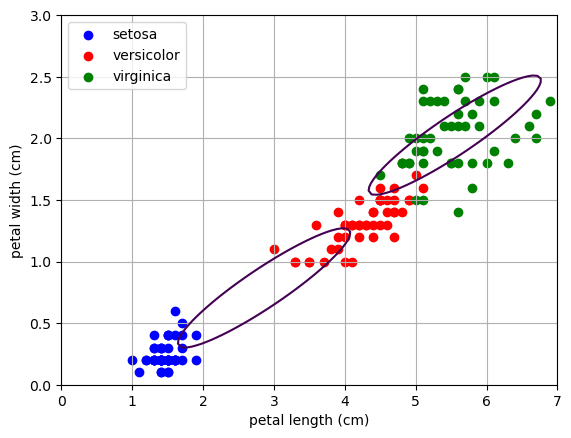

In [64]:
# Plot "not_virginica" covariance contour (so called 1-sigma environment).
z = multivariate_normal.pdf(features_grid, mean_not_virginica, tied_covariance)
plt.contour(x, y, z, [
    multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), tied_covariance) * np.exp(-0.5 * 1 ** 2)
])

# Plot "virginica" covariance contour (so called 1-sigma environment).
z = multivariate_normal.pdf(features_grid, mean_virginica, tied_covariance)
plt.contour(x, y, z, [
    multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), tied_covariance) * np.exp(-0.5 * 1 ** 2)
])

add_scatter_to_plot()
plt.show()

In [65]:
# Calculate the weight vector (normal to the decision boundary)
w_lda = np.linalg.inv(tied_covariance) @ (mean_virginica - mean_not_virginica)

# Calculate the bias term (x0) for the decision boundary
x0_lda = 0.5 * (mean_not_virginica + mean_virginica)  # Midpoint between the means

w_lda, x0_lda

(array([-0.81613039,  7.15737056]), array([4.2065, 1.406 ]))

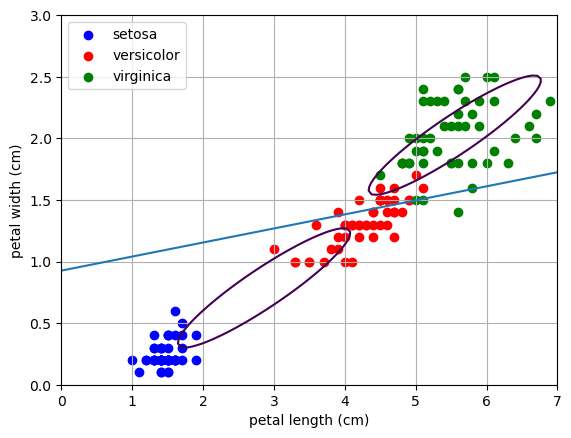

In [66]:
# Plot "not_virginica" covariance contour (so called 1-sigma environment).
z = multivariate_normal.pdf(features_grid, mean_not_virginica, tied_covariance)
plt.contour(x, y, z, [
    multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), tied_covariance) * np.exp(-0.5 * 1 ** 2)
])

# Plot "virginica" covariance contour (so called 1-sigma environment).
z = multivariate_normal.pdf(features_grid, mean_virginica, tied_covariance)
plt.contour(x, y, z, [
    multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), tied_covariance) * np.exp(-0.5 * 1 ** 2)
])

x_linspace = np.linspace(0, 7, 2)
plt.plot(x_linspace, -w_lda[0] / w_lda[1] * x_linspace + w_lda[0] / w_lda[1] * x0_lda[0] + x0_lda[1])

add_scatter_to_plot()
plt.show()

# Perform LDA for the three class problem

Now perform an LDA for the three class problem and visualize the decision boundaries.

In [67]:
features = ds['data'][:, 2:]
features.shape

(150, 2)

In [68]:
def labels_to_one_hot(labels, num_classes=None):
    """Experiment with inputs to this function, to check what it does."""
    num_classes = np.max(labels) + 1 if num_classes is None else num_classes
    return np.eye(num_classes)[labels]

In [69]:
labels = labels_to_one_hot(ds['target'])
labels.shape

(150, 3)

In [70]:
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [71]:
N = features.shape[0]  # Total number of samples

# Number of samples per class
counts = np.bincount(ds['target'])

# Class means
means = np.array([features[ds['target'] == k].mean(axis=0) for k in range(len(counts))])

# Tied covariance matrix
centered = features - means[ds['target']]  # Center the data
tied_covariance = (centered.T @ centered) / N

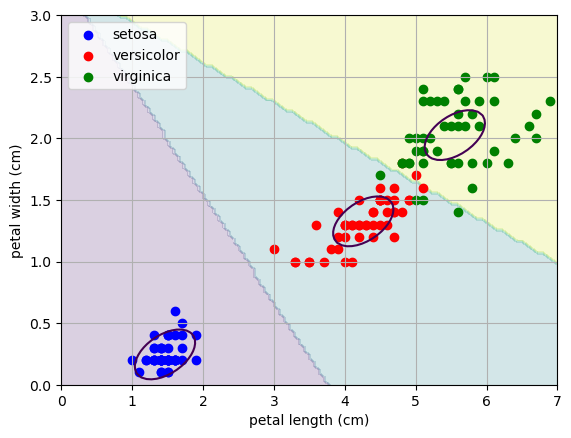

In [72]:
K = 3  # Number of classes

for k in range(3):
    z = multivariate_normal.pdf(features_grid, means[k, :], tied_covariance)

    plt.contour(x, y, z, [
        multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), tied_covariance) * np.exp(-0.5 * 1 ** 2)
    ])
    
z = np.stack([multivariate_normal.pdf(features_grid, means[k, :], tied_covariance) for k in range(K)])
c_hat = np.argmax(z, axis=0)

plt.contourf(x, y, c_hat, alpha=0.2)

for target_index, (target_name, color) in enumerate(zip(ds['target_names'], ['blue', 'red', 'green'])):
    X = ds['data'][ds['target'] == target_index, :]
    plt.scatter(X[:, 2], X[:, 3], c=color, label=target_name)
    
plt.legend()

plt.xlabel(ds['feature_names'][2])
plt.ylabel(ds['feature_names'][3])
plt.show()

# Apply the MAP criterion and calculate accuracy for each 3-class estimator

Apply the MAP criterion for both classifiers and calculate the accuracy.

In [73]:
# Calculate the class priors
priors = counts / N

# Calculate the discriminant function for each class
z = []
for k in range(len(means)):
    # Calculate the log-likelihood for each class
    centered = features - means[k]
    # Calculate the quadratic form: (x-μ)ᵀΣ⁻¹(x-μ)
    quad_form = np.sum(centered @ np.linalg.inv(tied_covariance) * centered, axis=1)
    # Discriminant function: -0.5*quad_form + log(prior_k)
    z_k = -0.5 * quad_form + np.log(priors[k])
    z.append(z_k)

# Stack results and get the predicted class
z = np.column_stack(z)
c_hat = np.argmax(z, axis=1)

# Calculate accuracy
correct = np.sum(np.equal(c_hat, ds['target']))
N = len(ds['target'])
print('Accuracy: {:.2f}%'.format(correct / N * 100))

Accuracy: 96.00%


# Outlook: Pandas DataFrame
Pandas DataFrame provides a table based view on data

In [74]:
df = pd.DataFrame(
    ds.data,
    columns=ds.feature_names,
)
df = pd.concat([df, pd.DataFrame([ds.target_names[t] for t in ds.target], columns=['target_names'])], axis=1)
seaborn.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target_names')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
